# In-Class 1: Springs and Pendula

In last week's lab, you generated datasets from damped and un-damped springs, as well as a pendulum. You were able to use this data to measure periods of oscillation and estimate spring constants and the gravitational acceleration constant.

Today, we'll look more closely at this data's full functional form, and see how much more precisely we can extract those values.

## Getting started with springs

We're going to use some Python to make these plots, but I don't expect you to understand every element. We'll build some basic Python skills over the semester.

First, we're going to load in the data you saved from your undamped spring, and plot the data. To put your data onto ISAAC, use the `Upload` button on your Jupyter notebook main page, and make a note of the filename. In the next codeblock, edit the filename so it points to your data.

In [8]:
# TODO: Add your file name here and execute the cell
myFile = r"C:\Users\evant\Downloads\Free Oscillation.csv"

Now you've stored that filename in a variable called `myFile`. So long as you've executed that cell (selected it, then click the `Run` button or hit `Shift+Enter`) you'll be able to use that variable in any other cells you execute.

Let's see if it worked.

In [9]:
# This is a python module: it's not part of the default environment, but we can import it and use its functions
# Pandas is a module that helps us manipulate data, and it can read in csv files
import pandas as pd

myData = pd.read_csv(myFile)

# We can print its contents to see if it worked
# This should show us a summary of what the data looks like
print(myData)

     Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0        71.8                  4.2800                  0.3610   
1        71.8                  4.1800                  0.3990   
2        71.9                  3.9900                  0.3970   
3        71.9                  3.6900                  0.3860   
4        71.9                  3.3500                  0.3430   
..        ...                     ...                     ...   
495      81.7                  0.3060                  0.4040   
496      81.7                 -0.0324                  0.2020   
497      81.7                 -0.2920                 -0.0864   
498      81.7                 -0.4390                  0.1460   
499      81.7                 -0.0331                  0.1280   

     Acceleration z (m/s^2)  
0                    0.0137  
1                   -0.0529  
2                   -0.0749  
3                   -0.0585  
4                   -0.0633  
..                      ...  
495      

Our dataset has four columns: time, and the measured acceleration in x, y, and z. This should look a lot like the data you put in your spreadsheet during the lab.

We've read this data into an object called a dataframe, which is defined in a module called Pandas. The dataframe is a way of storing spreadsheet-like data, and it lets us quickly make operations on full columns to get results. We'll see some examples of that later.

We can access each of these columns by using the column headers. To access a list of all the time values, for example, we can use this syntax: `myData['Time (s)']`. 

In [10]:
# As we saw last week, we can access individual columns of this data with this syntax
print(myData['Time (s)'])

# We can access individual elements of this column by adding another index, this one numeric
print() # Just adding an empty line
print("Element 3 of the time column:", myData['Time (s)'][3])

0      71.8
1      71.8
2      71.9
3      71.9
4      71.9
       ... 
495    81.7
496    81.7
497    81.7
498    81.7
499    81.7
Name: Time (s), Length: 500, dtype: float64

Element 3 of the time column: 71.9


In this dataset, time is the independent variable, and the other three columns are measurements as a function of time. We can make a simple plot of from this that shows how the three dependent variables change with time. This should look a lot like the plot you made during the lab.

If your dataset has a lot of junky areas, you can uncomment the code block below and put in the values you want to isolate just the good parts.

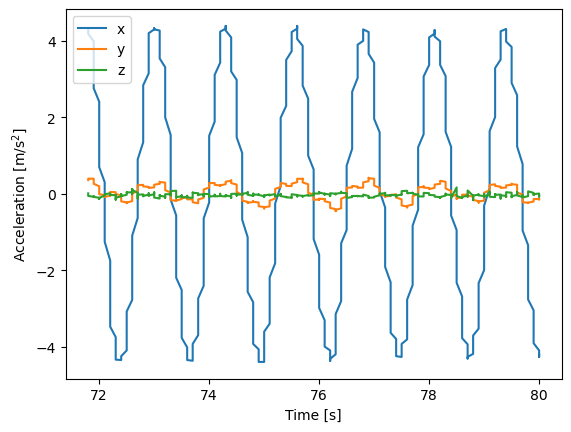

In [11]:
# Another module we'll use a lot is matplotlib, and in particular its submodule, pyplot. 
from matplotlib import pyplot as plt

# TODO: Modify and uncomment this to cut out any messy parts of data 
t0 = 0     # This is where you want your plot to begin
tf = 80   # This is where you want your plot to end
myData = myData[myData['Time (s)'].between(t0, tf)]   # This is selecting data for all columns between those time points

# Plot the basic raw data from the spring
plt.plot(myData['Time (s)'],myData['Acceleration x (m/s^2)'], label='x')
plt.plot(myData['Time (s)'],myData['Acceleration y (m/s^2)'], label='y')
plt.plot(myData['Time (s)'],myData['Acceleration z (m/s^2)'], label='z')
plt.xlabel('Time [s]')
plt.ylabel(r'Acceleration [m/s$^2$]')
plt.legend()
plt.show()

Let's focus on motion in one direction. In your data, the choice of direction might be different, depending on the setup you used, but hopefully you have most of your motion aligned with one of our axes. If we think this is an un-damped spring, we know that the motion should follow a cosine wave. Its generic form looks like this:

$$ x(t) = A\cos(kx-\omega t) $$

Let's test this out -- how well does a cosine wave approximate our data? The code below will overlay a cosine wave with adjustable parameters on the motion in the x direction. Can you adjust them to find a cosine wave that fits?

Warning: this code will get a bit more complex, don't worry -- you don't need to know how to make sliders! But basically we're just putting all the old code into a function, which means we can call it over and over again with different parameters. Every time the sliders change, the function gets called again and we get a new plot.

In [ ]:
# Create a model for the data with adjustable parameters
import numpy as np
from ipywidgets import interact, FloatSlider

def interact_cosine(A, w, phi):
 
    # Create a set of t points in a range that matches the data
    t0 = myData['Time (s)'].iloc[0]    # Get the value of the first time point
    tf = myData['Time (s)'].iloc[-1]   # Get the value of the last time point
    t = np.linspace(t0, tf, 200)
    
    # Generate our y values for every t point according to our function
    # We're offsetting our t here to make our lives easier, try removing the offset
    # if you're curious why
    y = A*np.cos(w*(t-t0) - phi)

    # Plot y as a function of t and overlay the datapoints
    plt.plot(t, y, label="Model", color='orange')
    # The scatter function works just like plot, but it draws unconnected dots instead of lines
    plt.scatter(myData['Time (s)'],myData['Acceleration x (m/s^2)'], label="Data")
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel(r'Acceleration [m/s$^2$]')
    # Matplotlib uses something called Mathtext to render greek letters and equations
    # It uses syntax similar to LaTeX, where special symbols are indicated with a \, and are surrounded by $
    # The r before the string tells python not to use the raw value, and not the other special meanings for \ (escape)
    # You can try printing out simple strings like r'\'' and '\'' to explore the difference
    plt.title(r'Testing function: f(t) = A cos($\omega$t-$\phi$)')

# Draw the whole thing with sliders for input
a = interact(interact_cosine, 
            A = FloatSlider(min=0, max=5, step=0.01, value=0.5),
            w = FloatSlider(min=0, max=10, step=0.01, value=2),
            phi = FloatSlider(min=0, max=2*np.pi, step=0.1, value=2))

interactive(children=(FloatSlider(value=0.5, description='A', max=5.0, step=0.01), FloatSlider(value=2.0, desc…

### Add your conclusions here:

#### What are the best fit values for your parameters?
A = 4.37 ; w = 4.98 ; phi = 0.00
#### Does your frequency match the one you measured in your lab within error?
Our measured angular frequency is close, but it is not within the error. We found angular frequency to be 4.775 +/- 0.1 
#### Does this model fit the data well? Are there any signs that the model isn't perfect? What could explain this?
This model does fit the data very well. The data matches the modeled cosine function very closely, and there is not much variation. If there is any slight variation it could have resulted from imperfect lab condtions due to accidental force being applied to the oscillator, or in other words, we accidentally gave the phone a slight push rather than starting from rest. 

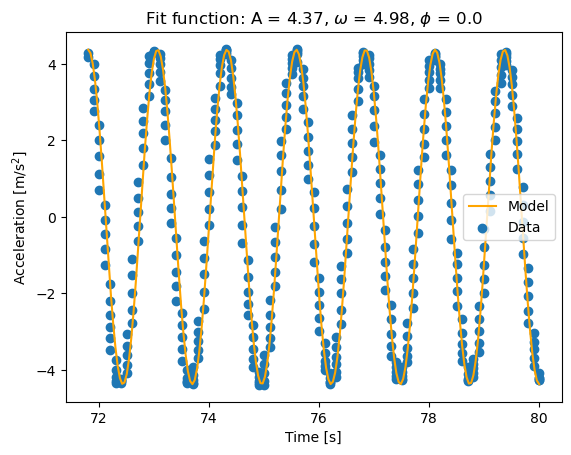

In [13]:
# Make your final plot
# TODO: Modify your parameters here:
A = 4.37
w = 4.98
phi = 0.00

# Create a set of t and y points using your fit paramters
t0 = myData['Time (s)'].iloc[0]    # Get the value of the first time point
tf = myData['Time (s)'].iloc[-1]   # Get the value of the last time point
t = np.linspace(t0, tf, 200)
y = A*np.cos(w*(t-t0) - phi)

# Plot your modeled wave and your data
plt.plot(t, y, label="Model", color='orange')
plt.scatter(myData['Time (s)'],myData['Acceleration x (m/s^2)'], label="Data")
plt.xlabel('Time [s]')
plt.ylabel(r'Acceleration [m/s$^2$]')
plt.legend()
# This is special syntax for string formatting -- each set of curly brackets gets replaced with 
# the value of the variables that are passed to the format function
plt.title(r'Fit function: A = {}, $\omega$ = {}, $\phi$ = {}'.format(A,w,phi))  
plt.show()

### Adding in damping:

Once we explicitly damp our spring, we should see that a cosine wave is now a very bad approximation. A damped oscillator continues to oscillate, but the amplitude shrinks with time according to an exponential. For motion in one direction, the equation for a damped oscillator looks like this:

$$ x(t) = e^{-\gamma t}A\cos(\omega t) $$

where 

$$ \gamma = \frac{b}{2m} $$

Let's try fitting our damped oscillator with this function. First, upload your damped oscillator data and point this variable to it, then select the time period you want. 

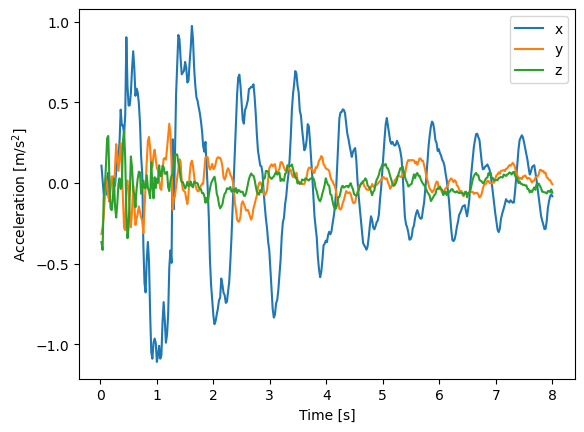

In [14]:
# TODO: Add in your filename for the damped oscillator
myFile = r"C:\Users\evant\Downloads\Lab2 SHM CSV\Lab2SHM Dampen CSV.csv"
myData = pd.read_csv(myFile)

# TODO: Modify and uncomment this to cut messy parts of data if you need to
t0 = 0
tf = 8
myData = myData[myData['Time (s)'].between(t0, tf)]

# Plot the basic raw data from the spring
plt.plot(myData['Time (s)'],myData['Acceleration x (m/s^2)'], label='x')
plt.plot(myData['Time (s)'],myData['Acceleration y (m/s^2)'], label='y')
plt.plot(myData['Time (s)'],myData['Acceleration z (m/s^2)'], label='z')
plt.xlabel('Time [s]')
plt.ylabel(r'Acceleration [m/s$^2$]')
plt.legend()
plt.show()

Just as before, we'll now try to fit our function to our data and extract the parameters. 

In [15]:
def interact_damped_cosine(A, w, phi, gamma):
 
    # Create a set of time points in a range that matches the data
    t0 = myData['Time (s)'].iloc[0]    # Get the value of the first time point
    tf = myData['Time (s)'].iloc[-1]   # Get the value of the last time point
    t = np.linspace(t0, tf, 200)
    
    # Generate a set of y points with the function we're testing
    y = A*np.exp(-gamma*(t-t0))*np.cos(w*(t-t0) - phi)

    # Plot y as a function of t and overlay the datapoints
    plt.plot(t, y, label="Model", color='orange')
    plt.scatter(myData['Time (s)'], myData['Acceleration x (m/s^2)'], label="Data")
    plt.xlabel('Time [s]')
    plt.ylabel(r'Acceleration [m/s$^2$]')
    plt.legend()
    plt.title(r'Testing function: f(t) = A $e^{-\gamma t}$ cos($\omega$t-$\phi$)')

# Draw the whole thing with sliders for input
a = interact(interact_damped_cosine, 
            A = FloatSlider(min=0, max=2, step=0.01, value=0.5),
            w = FloatSlider(min=0, max=10, step=0.01, value=2),
            phi = FloatSlider(min=0, max=2*np.pi, step=0.1, value=2),
            gamma = FloatSlider(min=0, max=1, step=0.01, value=0.01))

interactive(children=(FloatSlider(value=0.5, description='A', max=2.0, step=0.01), FloatSlider(value=2.0, desc…

### Add your conclusions here:

#### What are the best fit values for your parameters?
A = 1.00 ; w = 7.16 ; phi = 4.30 ; gamma = 0.15
#### Is your frequency the same as for the undamped oscillator? Is this expected?
The frequeny is slightly different for the undamped oscillator, which was expected. 
#### Does this model fit the data well? Are there any signs that the model isn't perfect? What could explain this?
This model fits teh data decently well, but not perfectly. Again there is some variation in the amplitude between the model and the data, but there is also some variation in peaks for some line up with the model but some do not and there is no perfect match. These variations again likely to imperfect lab conditions via accidental extra forces being applied. 

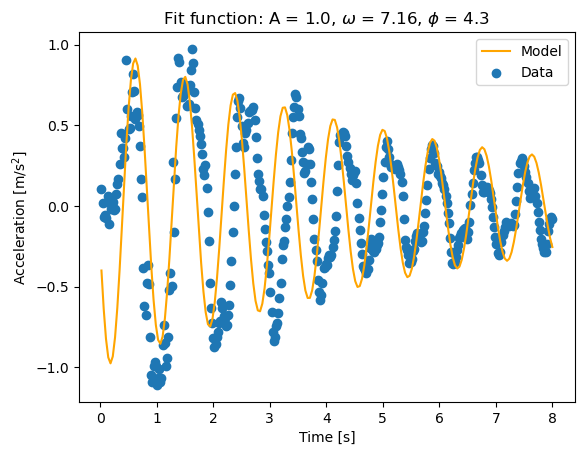

In [16]:
# TODO: Your turn: use code snippets from above to make a simple plot of your data and your model function
# You can look to the last time we did this for an example -- it only needs a small modification

# TODO: Add your parameters here
A = 1.00
w = 7.16
phi = 4.30
gamma = 0.15

# TODO: Create a set of t and y points using your fit paramters
t0 = myData['Time (s)'].iloc[0]    # Get the value of the first time point
tf = myData['Time (s)'].iloc[-1]   # Get the value of the last time point
t = np.linspace(t0, tf, 200)
y = A * np.exp(-gamma * (t - t0)) * np.cos(w * (t - t0) - phi)
# TODO: Plot your modeled wave and your data
plt.plot(t, y, label="Model", color='orange')
plt.scatter(myData['Time (s)'],myData['Acceleration x (m/s^2)'], label="Data")
plt.xlabel('Time [s]')
plt.ylabel(r'Acceleration [m/s$^2$]')
plt.legend()
plt.title(r'Fit function: A = {}, $\omega$ = {}, $\phi$ = {}'.format(A,w,phi))  
plt.show()

## Moving on to pendula

Export the data from our [google sheet](https://docs.google.com/spreadsheets/d/1QwSzo-TAwZW3W0EcNM4iV9aRRCu_AjteIF4sT_Y5oMo/edit?usp=sharing) as a CSV, and upload it here.

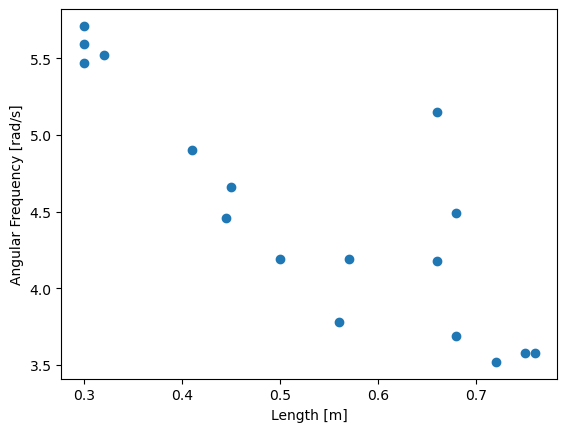

In [18]:
# TODO: Add the file name here
classFile = r"C:\Users\evant\Downloads\SheetOne - Sheet1.csv"
classData = pd.read_csv(classFile)

# Plot the basic raw data from the spring
# TODO: improve the style (see instructions below)
#plt.plot(classData['Length [m]'], classData['Angular Frequency [rad/s]'])
#plt.plot(classData['Length [m]'], classData['Angular Frequency [rad/s]'], marker='o', linestyle='none')
plt.scatter(classData['Length [m]'], classData['Angular Frequency [rad/s]'])
plt.xlabel('Length [m]')
plt.ylabel('Angular Frequency [rad/s]')
plt.show()

**This is not a great way to plot this data!** It doesn't make much sense to connect these lines, since they're not in order, and we have no way of visualizing the errors on each. Let's try something better suited.

First, look at the code above and try commenting out the line that plots the data currently, and uncommenting the line below it or the one after that. Each of them should do the same thing -- we can use special functions like scatter to plot data like this, or we can manipulate the plot aesthetics by modifying plotting options. 

But we're still missing any information about error bars. To show those, we'll have to pull in that data from the spreadsheet, manipulate it a bit, and use a new plotting function.

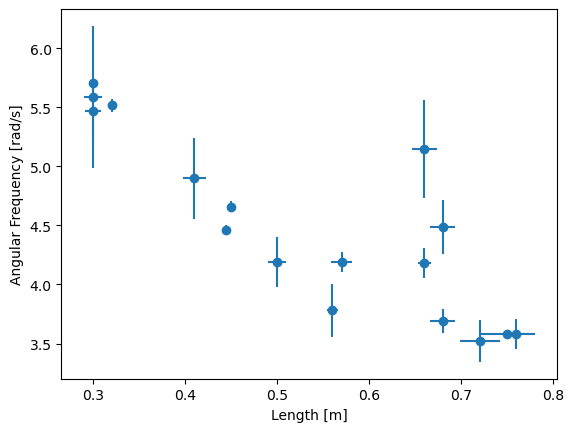

In [19]:
# First calculate the size of the errors we want on each datapoint -- we need these to be on the same 
# scale as our datapoints, so they have to have the same units.

# Pandas dataframes let us perform operations on whole columns of data as if we were doing it on one element
# (error in meters) = (length in meters)(percent error)/100
classData['Length Uncertainty [m]'] = classData['Length Uncertainty [%]']*classData['Length [m]']/100
classData['Angular Frequency Uncertainty [rad/s]'] = classData['Angular Frequency Uncertainty [%]']*classData['Angular Frequency [rad/s]']/100

# TODO: Try printing out your dataframe now -- you should see that you've successfully added new columns

plt.errorbar(classData['Length [m]'],classData['Angular Frequency [rad/s]'], 
             yerr=classData['Angular Frequency Uncertainty [rad/s]'], xerr=classData['Length Uncertainty [m]'],
             marker='o', linestyle='none')

plt.xlabel('Length [m]')
plt.ylabel('Angular Frequency [rad/s]')
plt.show()

Hopefully now you can see the x and y errors on each point. This will help guide our eye when we try to fit the function. 

In [ ]:
def interact_sqrt(A):
 
    # Create a set of x points in a range that matches the data
    x0 = 0.3
    xf = 5
    x = np.linspace(x0, xf, 200)
    
    # Generate a set of y points with the function we're testing
    y = A*np.sqrt(1/x)

    # Plot y as a function of x and overlay the datapoints
    plt.plot(x, y, label="Model", color='orange')
    plt.errorbar(classData['Length [m]'],classData['Angular Frequency [rad/s]'], 
             yerr=classData['Angular Frequency Uncertainty [rad/s]'], xerr=classData['Length Uncertainty [m]'],
             marker='o', linestyle='none', label='Data')
    plt.legend()
    plt.xlabel('Length [m]')
    plt.ylabel('Angular Frequency [rad/s]')
    plt.title(r'Testing function: f(t) = A $\sqrt{1/x}$')

# Draw the whole thing with sliders for input
a = interact(interact_sqrt, 
            A = FloatSlider(min=0, max=10, step=0.1, value=5))

interactive(children=(FloatSlider(value=5.0, description='A', max=10.0), Output()), _dom_classes=('widget-inte…

### Add your conclusions here:

#### Take your fit value of A, and calculate g.
9.61
#### Are there any outlier points? What might have caused this?
There are some outlier points, and these could have been a result of other group's imperfect lab conditions and also adding extra forces on accident whether it be a slight push, or a loose swinging platform where the pole could move back and forth to add dampening. 

### _For a challenge..._

Here are three increasingly hard extensions to today's exercises that are beyond the scope of what's expected of you in this class. Give them a try if you'd like, or ignore this completely! 

1. Fitting a square root is a lot harder to do by eye than fitting a line. Can you turn this problem into one that just requires you to fit a line? 
2. Try writing an automatic fitter for this dataset (for example using the curve_fit function from scipy).
3. Try writing an automatic fitter for our undamped spring. Can you get this to work as well as the manual version? What makes fitting a cosine wave challenging?